<a href="https://colab.research.google.com/github/01-vyom/Machine-Learning-Projects/blob/master/Kaggle/%20House%20Prices%3A%20Advanced%20Regression%20Techniques/House_Prediction_Kaggle.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **House Prediction Using Linear Regression**




### **Import and Load Data using Panda**

In [0]:
#Import And Load Data
import numpy as np # For numerical fast numerical calculations
import matplotlib.pyplot as plt # For making plots
import pandas as pd # Deals with data
import seaborn as sns # Makes beautiful plots
from sklearn.preprocessing import StandardScaler # Testing sklearn
import tensorflow as tf # Imports tensorflow
from sklearn import metrics
import keras # Imports keras
from tensorflow.python.data import Dataset
import math
tf.logging.set_verbosity(tf.logging.ERROR)

Ames_House_data = pd.read_csv("/content/drive/My Drive/House Price Prediction/train.csv")

print(Ames_House_data)


        Id  MSSubClass MSZoning  ...  SaleType  SaleCondition SalePrice
0        1          60       RL  ...        WD         Normal    208500
1        2          20       RL  ...        WD         Normal    181500
2        3          60       RL  ...        WD         Normal    223500
3        4          70       RL  ...        WD        Abnorml    140000
4        5          60       RL  ...        WD         Normal    250000
5        6          50       RL  ...        WD         Normal    143000
6        7          20       RL  ...        WD         Normal    307000
7        8          60       RL  ...        WD         Normal    200000
8        9          50       RM  ...        WD        Abnorml    129900
9       10         190       RL  ...        WD         Normal    118000
10      11          20       RL  ...        WD         Normal    129500
11      12          60       RL  ...       New        Partial    345000
12      13          20       RL  ...        WD         Normal   

### **Plotting lot Area vs Sale Price**

Text(0, 0.5, 'Sale Price')

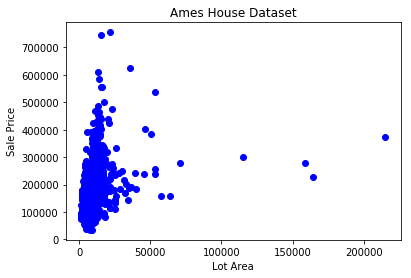

In [0]:

#Ploting SalePrice and LotArea
#Using Matplotlib and Scatterplot
fig,ax=plt.subplots()
ax.scatter(Ames_House_data["LotArea"],Ames_House_data["SalePrice"],color="blue")
ax.set_title("Ames House Dataset")
ax.set_xlabel("Lot Area")
ax.set_ylabel("Sale Price")

### **Plotting histogram of Lot Area**

Text(0, 0.5, 'Frequency')

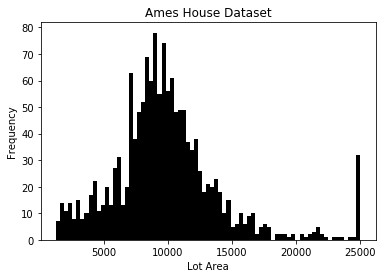

In [0]:
#Plottiong Histogram of Lot Areas
fig,ax=plt.subplots()
temp=[]
#[x for x in  if x<50000 else 50000]
for x in list(Ames_House_data["LotArea"]):
  if x < 25000:
    temp.append(x)
  else:
    temp.append(25000)
ax.hist(temp,color="black",bins = 75)
ax.set_title("Ames House Dataset")
ax.set_xlabel("Lot Area")
ax.set_ylabel("Frequency")

### **Plotting Line Chart**

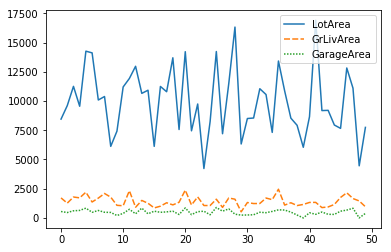

In [0]:
#Plottiong Line chart using Seaborn
sns.lineplot(data=Ames_House_data[:50][['LotArea','GrLivArea','GarageArea']])

### Feature selection and feature preprocessing

In [0]:
Ames_House_data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [0]:
#LotArea
#GarageArea
#OverallQual
#OverallCond
#define input features
def preprocess_features(Ames_House_data):
  selected_features = Ames_House_data[
    ["LotArea",
     "GarageArea",
     "OverallQual",
     "OverallCond"
    ]]
  processed_features = selected_features.copy()
  #MINMAX Scaling using formula:
  #(x-min)/(max-min)
  processed_features["LotArea"] = (((processed_features["LotArea"]/100)-13)/(2152.45-13))
  processed_features["GarageArea"] = ((processed_features["GarageArea"]-0)/(1481-0))
  processed_features["OverallQual"] = ((processed_features["OverallQual"]-1)/(10-1))
  processed_features["OverallCond"] = ((processed_features["OverallCond"]-1)/(9-1))
  return processed_features

#define output features
def preprocess_targets(Ames_House_data):
  output_targets = pd.DataFrame()
  output_targets["SalePrice"] = (
    Ames_House_data["SalePrice"])
  output_targets["SalePrice"] = (output_targets["SalePrice"]/100)
  return output_targets

  

### **Assigning Training and Target**

In [0]:
training_examples = preprocess_features(Ames_House_data)
training_examples.describe()

,LotArea,GarageArea,OverallQual,OverallCond
count,1460.000000,1460.000000,1460.000000,1460.000000
mean,0.043080,0.319365,0.566591,0.571918
std,0.046653,0.144365,0.153666,0.139100
min,0.000000,0.000000,0.000000,0.000000
25%,0.029229,0.225861,0.444444,0.500000
50%,0.038227,0.324105,0.555556,0.500000
75%,0.048150,0.388926,0.666667,0.625000
max,1.000000,0.957461,1.000000,1.000000


In [0]:
training_targets = preprocess_targets(Ames_House_data)
training_targets.describe()

,SalePrice
count,1460.000000
mean,1809.211959
std,794.425029
min,349.000000
25%,1299.750000
50%,1630.000000
75%,2140.000000
max,7550.000000


### **Defining Input Functions to Load Data Inside Tensorflow Model**

In [0]:
def my_input_fn(features, targets, batch_size=1, shuffle=True, num_epochs=None):  
    # Convert pandas data into a dict of np arrays.
    features = {key:np.array(value) for key,value in dict(features).items()}                                           
    # Construct a dataset, and configure batching/repeating.
    ds = Dataset.from_tensor_slices((features,targets)) # warning: 2GB limit
    ds = ds.batch(batch_size).repeat(num_epochs)
    # Shuffle the data, if specified.
    if shuffle:
      ds = ds.shuffle(10000)
    # Return the next batch of data.
    features, labels = ds.make_one_shot_iterator().get_next()
    return features, labels

### **Defining Construct Column Function**

In [0]:
def construct_feature_columns(input_features):
  #returns mulpiple feature column
  return set([tf.feature_column.numeric_column(my_feature)
              for my_feature in input_features])

### **Defining a Training Model**

In [0]:
def train_model(
    learning_rate,
    steps,
    batch_size,
    training_examples,
    training_targets):
  periods = 10
  steps_per_period = steps / periods
  
  # Create a linear regressor object.
  my_optimizer = tf.train.GradientDescentOptimizer(learning_rate=learning_rate)
  my_optimizer = tf.contrib.estimator.clip_gradients_by_norm(my_optimizer, 5.0)
  linear_regressor = tf.estimator.LinearRegressor(
      feature_columns=construct_feature_columns(training_examples),
      optimizer=my_optimizer
  )
  # Create input functions.
  training_input_fn = lambda: my_input_fn(
      training_examples, 
      training_targets["SalePrice"], 
      batch_size=batch_size)
  predict_training_input_fn = lambda: my_input_fn(
      training_examples, 
      training_targets["SalePrice"], 
      num_epochs=1, 
      shuffle=False)
  # Train the model, but do so inside a loop so that we can periodically assess
  # loss metrics.
  print("Training model...")
  print("RMSE (on training data):")
  training_rmse = []
  for period in range (0, periods):
    # Train the model, starting from the prior state.
    linear_regressor.train(
        input_fn=training_input_fn,
        steps=steps_per_period,
    )
    # Take a break and compute predictions.
    training_predictions = linear_regressor.predict(input_fn=predict_training_input_fn)
    training_predictions = np.array([item['predictions'][0] for item in training_predictions])
    
    
    # Compute trainingloss.
    training_root_mean_squared_error = math.sqrt(
        metrics.mean_squared_error(training_predictions, training_targets))
    # Occasionally print the current loss.
    print("  period %02d : %0.2f" % (period, training_root_mean_squared_error))
    # Add the loss metrics from this period to our list.
    training_rmse.append(training_root_mean_squared_error)
  print("Model training finished.")

  # Output a graph of loss metrics over periods.
  plt.ylabel("RMSE")
  plt.xlabel("Periods")
  plt.title("Root Mean Squared Error vs. Periods")
  plt.tight_layout()
  plt.plot(training_rmse, label="training")
  plt.legend()

  return linear_regressor

### **Evaluating Linear Regression Model**

Training model...
RMSE (on training data):
  period 00 : 1587.52
  period 01 : 1222.07
  period 02 : 908.26
  period 03 : 728.56
  period 04 : 690.43
  period 05 : 672.97
  period 06 : 657.14
  period 07 : 645.04
  period 08 : 635.31
  period 09 : 620.65
Model training finished.


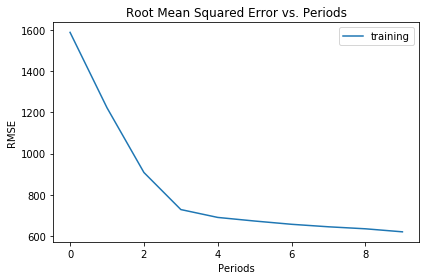

In [0]:
linear_regressor = train_model(
    learning_rate=0.8,
    steps=800,
    batch_size=5,
    training_examples=training_examples,
    training_targets=training_targets)

### **Testing ON TEST set**

In [0]:
def my_input_fn1(features, batch_size=1, shuffle=True, num_epochs=None):  
    # Convert pandas data into a dict of np arrays.
    features = {key:np.array(value) for key,value in dict(features).items()}                                           
    # Construct a dataset, and configure batching/repeating.
    ds = Dataset.from_tensor_slices((features)) # warning: 2GB limit
    ds = ds.batch(batch_size).repeat(num_epochs)
    # Shuffle the data, if specified.
    if shuffle:
      ds = ds.shuffle(10000)
    # Return the next batch of data.
    features= ds.make_one_shot_iterator().get_next()
    return features

/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


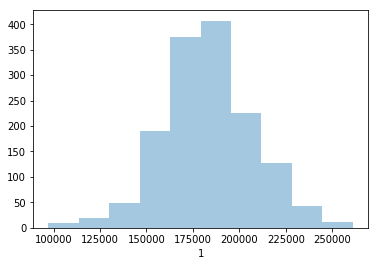

In [0]:
Ames_House_test_data = pd.read_csv("/content/drive/My Drive/House Price Prediction/test.csv")

test_examples = preprocess_features(Ames_House_test_data)
#test_targets = preprocess_targets(Ames_House_test_data)

predict_test_input_fn = lambda: my_input_fn1(
      test_examples, 
 #     test_targets["SalePrice"], 
      num_epochs=1, 
      shuffle=False)

test_predictions = linear_regressor.predict(input_fn=predict_test_input_fn)
#print(type(test_predictions),list(test_predictions),type(list(test_predictions)))
test_predictions =([item['predictions'][0] for item in test_predictions])
#print(test_predictions)
main =[]
k=1461
for i in range(len(test_predictions)):
  l=[k+i,test_predictions[i]*100]
  main.append(l)
df = pd.DataFrame(main)
sns.distplot(df[1], bins=10, kde=False)
#print(len(main))
# df = pd.DataFrame(main)
# df.to_csv('/content/drive/My Drive/House Price Prediction/submission2.csv', index=False)
#main_np = np.array(main)
#pd.DataFrame(main_np).to_csv("/content/drive/My Drive/House Price Prediction/submission.csv")
#print(main_np)
#root_mean_squared_error = math.sqrt(
    #metrics.mean_squared_error(test_predictions, test_targets))

#print("Final RMSE (on test data): %0.2f" % root_mean_squared_error)